<a href="https://colab.research.google.com/github/m-j-w-f/data/blob/main/Text_Analyis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving chat.txt to chat (1).txt


In [ ]:
text_raw = list()

t = re.compile("^\[[0-9][0-9]\.[0-9][0-9]\.[0-9][0-9], [0-9][0-9]:[0-9][0-9]:[0-9][0-9]\]")

with open('chat.txt') as f:
    for index, line in enumerate(f):
        if re.match(t, line.strip()):
          if index != 0:
            text_raw.append(text)
          text = line.strip()
        else:
          text = text + " " +line.strip()

df = pd.DataFrame(text_raw, columns = ["text_raw"])

In [ ]:
df = df.drop(index = [0,1,2])
df = df.reset_index(drop=True)

In [ ]:
for i in range(len(df)):
  df["text_raw"][i] = df["text_raw"][i].replace("\u200e","")

In [ ]:
df["date"]=""
df["day"]=""
for i in range(len(df)):
  date_raw = df["text_raw"][i][1:19]
  df.date[i] = datetime.strptime(date_raw, "%d.%m.%y, %H:%M:%S")
  df.day[i] = datetime.strptime(date_raw[:8], "%d.%m.%y")

In [ ]:
df["text"]=""
df["send"]=""
for i in range(len(df)):
  split = df.text_raw[i].split(":",3)
  df.text[i] = (split[3][1:]).lower()
  df.send[i] = split[2][4:]

In [ ]:
# date = df.day[0]
# s = 0
# m = 0
# for i in range(len(df)):
#   if date != df.day[i]:
#     if(df.send[i] == "Jonas Böhm"):
#       s += 1
#     else:
#       m += 1
#   date = df.day[i]

# print("Moritz = {mo}, Jonas = {so}" .format(mo=m, so=s))

Moritz = 43, Jonas = 34


In [ ]:
import string
PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
  #custom function to remove the punctuation
  return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_no_punct"] = df["text"].apply(lambda text: remove_punctuation(text))

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('german'))
STOPWORDS.add("bild")
STOPWORDS.add("sticker")
STOPWORDS.add("weggelassen")
#sender names
for sender in senders:
  fullname = sender.split()
  for name in fullname:
    STOPWORDS.add(name)

#Diese Nachricht wurde gelöscht
STOPWORDS.add("nachricht")
STOPWORDS.add("gelöscht")
STOPWORDS.add("diese")
STOPWORDS.add("wurde")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
  #custom function to remove the stopwords
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [ ]:
df["text_no_stop"]=""
df["text_no_stop"] = df["text_no_punct"].apply(lambda text: remove_stopwords(text))

In [ ]:
fulltxt = list()
senders = np.unique(df["send"])

for sender in senders:
  fulltxt.append(" ".join(df.text_no_stop[df.send == sender]))

df_full = pd.DataFrame({"send" :senders, "fulltext": fulltxt})
txt_f = " ".join(df.text_no_stop)
df_full = df_full.append({"send": "all", "fulltext": txt_f}, ignore_index=True)
df_full["length"] = df_full["fulltext"].apply(lambda text: len(text.split()))

In [ ]:
df_full["number of messages"]=""
for i in range(len(senders)):
  df_full.loc[i,"number of messages"] = sum(df["send"] == senders[i])
df_full.loc[i+1,"number of messages"] = sum(df_full.head(n = len(senders))["number of messages"].values)

In [ ]:
from collections import Counter
counters = list()
for sender in senders:
  txt = df_full["fulltext"][df_full["send"] == sender].values[0]
  c = Counter(txt.split())
  counters.append(c)
counters.append(Counter(df_full["fulltext"][len(senders)].split()))

top15 = list()
counter = list()
for word, count in counters[len(senders)].most_common(15):
  top15.append(word)
  counter.append(count)
df_common = pd.DataFrame({"words": top15,"count": counter})

i=0
for sender in senders:
  df_common[sender] = ""
  for word in df_common["words"]:
    df_common.loc[df_common["words"] == word, sender] = counters[i][word]
  i += 1 


In [ ]:
#normalize word count
for sender  in senders:
  arr = np.array(df_common[sender])
  arr = arr/sum(arr)
  df_common[sender] = arr

In [ ]:
swearwords = ["31er",
              "arsch",
              "ärsche",
              "arschkriecher",
              "assi",
              "assis",
              "abficken",
              "abficker",
              "abfickt",
              "abgefickt",
              "arschloch",
              "arschlöcher",
              "aslok",
              "arschlok",
              "azzlak",
              "bastard",
              "bastarde",
              "bumsen",
              "bulle",
              "bullen",
              "bitch",
              "bitches",
              "brillenschlange",
              "clown",
              "clowns",
              "crackbitch",
              "crackhure",
              "vercrackt",
              "covidiot",
              "covidioten",
              "crack",
              "dumpfbacke",
              "dick",
              "eierkopf",
              "esel",
              "fick",
              "fik",
              "fuck",
              "ficken",
              "fotze",
              "fotzen",
              "fresse",
              "fressen",
              "gammler",
              "gay",
              "gayer",
              "goofy",
              "goofys",
              "grobian",
              "gutmensch",
              "hund",
              "hunde",
              "hond",
              "hure",
              "huren",
              "hurensohn",
              "hurensöhne",
              "hurenkind",
              "hurenkinder",
              "hurenmutter",
              "hurenbursche",
              "hurenbub",
              "homosexuell",
              "homosexuelle",
              "homosexueller",
              "idiot",
              "idioten",
              "inzest",
              "inzestbach",
              "jungfrau",
              "jungfräulich",
              "jf",
              "kanacke",
              "kanacken",
              "kacke",
              "kackt",
              "kacken",
              "kinderficker",
              "kek",
              "keko",
              "krüppel",
              "kameltreiber",
              "muffel",
              "narr",
              "nazi",
              "neger",
              "nigger",
              "nigga",
              "nikka",
              "negga",
              "nerd",
              "nutte",
              "nutten",
              "nuttö",
              "opfer",
              "penner",
              "pedo",
              "pedos",
              "pädo",
              "pädos",
              "porn",
              "porno",
              "querdenker",
              "schmock",
              "schnorrer",
              "schnösel",
              "sex",
              "snob",
              "spast",
              "spasten",
              "spasst",
              "spassten",
              "spasti",
              "schwuchtel",
              "schwuchteln",
              "sozialschmarotzer",
              "spießer",
              "schwans",
              "schwanz",
              "schmutz",
              "spiesser",
              "trottel",
              "vollpfosten",
              "wigger",
              "zigeuner",
              "valla",
              "vallah",
              "ziegenficker",
              "kelb",
              "yarro",
              "yarrak",
              "yaro",
              "yarak"
              ]

In [ ]:
arabic = ["inshallah",
          "inshalla",
          "bismillah",
          "bismilla",
          "mashallah",
          "mashallah",
          "lak",
          "shu",
          "ya",
          "salame",
          "kelb",
          "yarro",
          "yarrak",
          "yalla",
          "yallah",
          "valla",
          "vallah",
          "yaro",
          "yarak"]

In [ ]:
number_swearwords = list()
for sent in df_full["fulltext"].values: 
  counter = 0;
  for word in sent.split():
    if word in swearwords:
      counter += 1
  number_swearwords.append(counter)
df_full["swearwords"] = number_swearwords

In [ ]:
number_arab = list()
for sent in df_full["fulltext"].values: 
  counter = 0;
  for word in sent.split():
    if word in arabic:
      counter += 1
  number_arab.append(counter)
df_full["arab"] = number_arab

In [ ]:
#normalize swearwords

arr1 = np.array(df_full["swearwords"])
arr2 = np.array(df_full["length"])

arr3 = (arr1/arr2)*10000

df_full["swearwords_normalized"] = arr3

In [ ]:
#normalize arab
arr1 = np.array(df_full["arab"])
arr2 = np.array(df_full["length"])

arr3 = (arr1/arr2)*10000

df_full["arab_normalized"] = arr3

In [ ]:
df_full_cut = df_full.head(n = len(senders))

In [ ]:
df

In [ ]:
df_common

In [ ]:
df_full

In [ ]:
df_full_cut

,send,fulltext,length,number of messages,swearwords,swearwords_normalized
0,Florian Riegel,k reihenfolge mo ja schreibt greg losfahrt hau...,8567,3346,47,54.861679
1,Gregor Henn,ja mo bleibste ok geil sitz vorne juhu yes fah...,35730,11314,428,119.787294
2,Luca Sorg,lauf mal pico einfach 20min hungerbühl bismar...,28621,9777,299,104.468747
3,Moritz 🌐,chillt gleich bruder tanken greg zuerst komme ...,20058,7319,145,72.290358


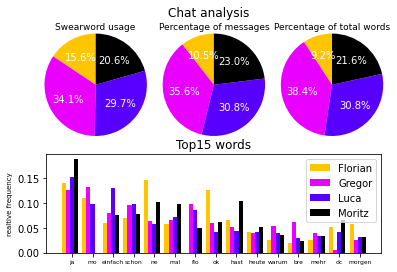

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mycolors = ["#FFC600", "#E900FF", "#5800FF", "#000000"]


# y1 = np.array([m,s])
# m_length = len(" ".join(df.text[df.send == "Moritz 🌐"]).split())
# s_length = len(" ".join(df.text[df.send == "Jonas Böhm"]).split())
# y2 = np.array([m_length,s_length])
# m_msg = len(df.text[df.send == "Moritz 🌐"])
# s_msg = len(df.text[df.send == "Jonas Böhm"])
# y3 = np.array([m_msg,s_msg])


#layout
plot1 = plt.subplot2grid((2, 3), (0, 0))
plot2 = plt.subplot2grid((2, 3), (0, 1))
plot3 = plt.subplot2grid((2, 3), (0, 2))
plot4 = plt.subplot2grid((2, 3), (1, 0), colspan=3)

#data
swear = df_full_cut["swearwords_normalized"]

#Percentage of Messages
per_msg = df_full_cut["number of messages"]


#Percentage of total Words
per_words = df_full_cut["length"]

#pie charts
_, _, autotexts = plot1.pie(swear, colors = mycolors, autopct='%1.1f%%',startangle = 90, radius = 1.3)
for autotext in autotexts:
    autotext.set_color('white')
plot1.set_title("Swearword usage", fontsize=9)

_, _, autotexts = plot2.pie(per_msg,colors = mycolors,autopct='%1.1f%%',startangle= 90,radius = 1.3)
for autotext in autotexts:
    autotext.set_color('white')

plot2.set_title("Percentage of messages", fontsize=9)



_, _, autotexts = plot3.pie(per_words, colors = mycolors, autopct='%1.1f%%',startangle = 90, radius = 1.3)
for autotext in autotexts:
    autotext.set_color('white')

plot3.set_title("Percentage of total words", fontsize=9)

#bar chart
X_axis = np.arange(len(top15))

i = -0.4
j = 0
for sender in senders:
  plot4.bar(X_axis + i, df_common[sender].values, 0.2, label = sender.split()[0], color = mycolors[j])
  i += 0.2
  j += 1

plot4.set_xticks(X_axis, minor=False)
plot4.axes.set_xticklabels(top15, fontsize = 6, minor=False)
plot4.set_ylabel("realtive frequency", fontsize = 7)
plot4.set_title("Top15 words")
plot4.legend()

plt.suptitle("Chat analysis", fontsize = 12)

plt.savefig('test.png', dpi = 200)
